In [ ]:
!pip install tensorflow-gpu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
# Folders for Model and Training History
os.makedirs("drive/My Drive/Models",exist_ok=True)
os.makedirs("drive/My Drive/Logs",exist_ok=True)

path_to_model="drive/My Drive/Models"
path_to_logs = "drive/My Drive/Logs"

# Task List
* No CNN for MNIST and CIFAR10

* CNN model and comapare it with FFNN mode

* Develop : Web based 

* Random unseen input

* Demonstrate

* Observations 

* What configuration of Neuron

* Update configuration and change in accuracy if any

# MNIST DNN

### Libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random 
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report ,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Get  Data

In [5]:
mnist_data = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist_data.load_data()
print("Shape training set "+str(train_images.shape))
print("Shape Test set "+str(test_images.shape))
print("No of training exapmles "+str(train_images.shape[0]))
print("No of Test exapmles "+str(test_images.shape[0]))
print("Shape of Each Image "+str(train_images[0].shape))

11493376/11490434 [==============================] - 0s 0us/step
Shape training set (60000, 28, 28)
Shape Test set (10000, 28, 28)
No of training exapmles 60000
No of Test exapmles 10000
Shape of Each Image (28, 28)


### Visualize Data

This is image of Number 7


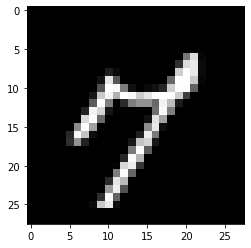

In [7]:

def disp():
    id = random.randint(0,train_images.shape[0])
    img = train_images[id]
    l = train_labels[id]
    plt.imshow(img,cmap='gray')
    print("This is image of Number "+str(l))
    plt.show()
disp()

### Normalize the data

In [8]:
train_images = train_images/255
test_images = test_images/255
print("Range of image 0-1")

Range of image 0-1


### Set Constants


In [9]:
model_name = 'mnist_dnn_'
input_shape = (28,28)
activation_h = tf.keras.activations.relu
activation_o = tf.keras.activations.softmax
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
epochs =100

### Model Construction

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape))
model.add(tf.keras.layers.Dense(128,activation=activation_h))
model.add(tf.keras.layers.Dense(10,activation=activation_o))
model.summary()

model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Training and Callback setup

In [11]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/{model_name}.h5", monitor = 'val_accuracy',verbose=1, save_best_only=True)
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)
logs = tf.keras.callbacks.CSVLogger(filename=f"{path_to_logs}/{model_name}.csv")
h=model.fit(train_images,train_labels,batch_size=128,validation_data=(test_images,test_labels),epochs=epochs,callbacks=[checkpointer,es,logs])

Epoch 1/100
467/469 [============================>.] - ETA: 0s - loss: 0.3624 - accuracy: 0.8994
Epoch 00001: val_accuracy improved from -inf to 0.94490, saving model to drive/My Drive/Models/mnist_dnn_.h5
469/469 [==============================] - 1s 3ms/step - loss: 0.3617 - accuracy: 0.8996 - val_loss: 0.1879 - val_accuracy: 0.9449
Epoch 2/100
464/469 [============================>.] - ETA: 0s - loss: 0.1618 - accuracy: 0.9540
Epoch 00002: val_accuracy improved from 0.94490 to 0.96080, saving model to drive/My Drive/Models/mnist_dnn_.h5
469/469 [==============================] - 1s 3ms/step - loss: 0.1614 - accuracy: 0.9541 - val_loss: 0.1340 - val_accuracy: 0.9608
Epoch 3/100
454/469 [============================>.] - ETA: 0s - loss: 0.1148 - accuracy: 0.9665
Epoch 00003: val_accuracy improved from 0.96080 to 0.96900, saving model to drive/My Drive/Models/mnist_dnn_.h5
469/469 [==============================] - 1s 3ms/step - loss: 0.1145 - accuracy: 0.9667 - val_loss: 0.1076 - val_

### Evaluation

 ### a. Training Plots

Text(0.5, 1.0, 'accuracy')

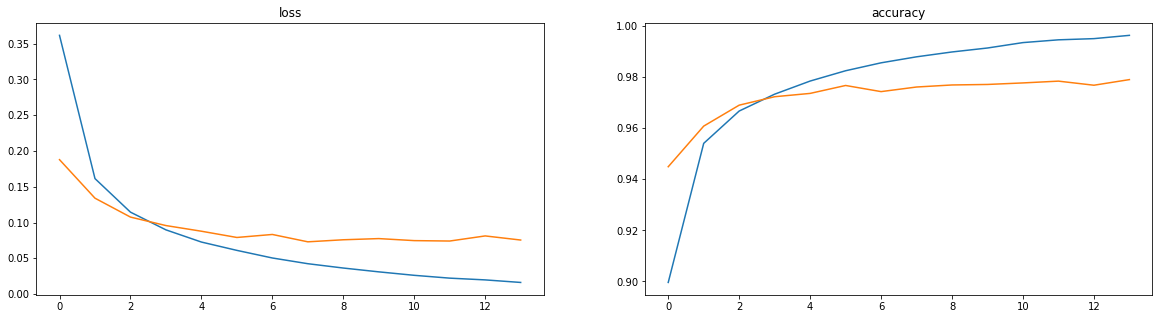

In [12]:

fig, axs = plt.subplots(1, 2,figsize=(20,5))

axs[0].plot(h.history['loss'])
axs[0].plot(h.history['val_loss'])
axs[0].set_title('loss')

axs[1].plot(h.history['accuracy'])
axs[1].plot(h.history['val_accuracy'])
axs[1].set_title('accuracy')



### b.Accuracy and loss

In [13]:
#Load model with best weights
model = tf.keras.models.load_model(f"{path_to_model}/{model_name}.h5")

In [14]:
loss, accuracy  = model.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy :{round(accuracy*1000,4)} %")
print(f"Validation Loss :{loss}")

Validation accuracy :99.4 %
Validation Loss :0.07550094276666641


In [15]:
loss, accuracy  = model.evaluate(train_images, train_labels,verbose=0)
print(f"Training Accuracy :{round(accuracy*1000,4)} %")
print(f"Training Validation Loss :{loss}")

Training Accuracy :98.6667 %
Training Validation Loss :0.012626009061932564


### c. Classification Report

In [16]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### d. Confusion Matrix

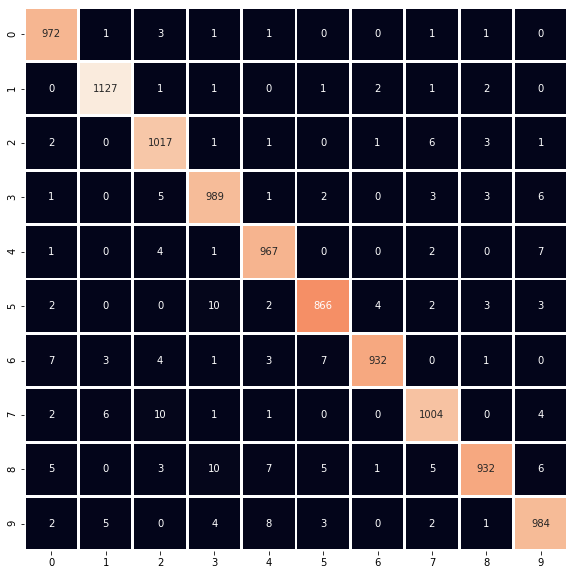

In [18]:
import seaborn as sns
labels = ['0','1','2','3','4','5','6','7','8','9']
cm=confusion_matrix(test_labels,p)
plt.figure(figsize=(10,10))
sns.heatmap(cm,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2)

# DNN Cifar

### Load and Visualize Data

In [19]:
cifar_data = tf.keras.datasets.cifar10
(train_images,train_labels),(test_images,test_labels) = cifar_data.load_data()
print("Shape of training set "+str(train_images.shape))
print("Shape of Test set "+str(test_images.shape))
print("No of training exapmles "+str(train_images.shape[0]))
print("No of Test exapmles "+str(test_images.shape[0]))
print("Shape of Each Image "+str(train_images[0].shape))

170500096/170498071 [==============================] - 4s 0us/step
Shape of training set (50000, 32, 32, 3)
Shape of Test set (10000, 32, 32, 3)
No of training exapmles 50000
No of Test exapmles 10000
Shape of Each Image (32, 32, 3)


This is image of Number [2]


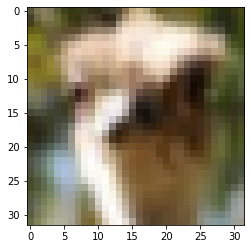

In [20]:
def disp():
    id = random.randint(0,train_images.shape[0])
    img = train_images[id]
    l = train_labels[id]
    plt.imshow(img)
    print("This is image of Number "+str(l))
    plt.show()
disp()

### Normalize Data

In [21]:
train_images = train_images/255
test_images = test_images/255
print("Range of image 0-1")

Range of image 0-1


### Set Constants


In [22]:
model_name = 'cifar_dnn'

input_shape = (32,32)
activation_h= tf.keras.activations.relu
activation_o = tf.keras.activations.softmax
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
epochs =100

### Model Creation

In [23]:
inp_shape=(32,32,3)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=inp_shape))
model.add(tf.keras.layers.Dense(512,activation=activation_h))
model.add(tf.keras.layers.Dense(256,activation=activation_h))
model.add(tf.keras.layers.Dense(128,activation=activation_h))
model.add(tf.keras.layers.Dense(10,activation=activation_o))
model.summary()


model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


## Training and callbacks

In [24]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/{model_name}.hdf5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True,)

es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15)

logs = tf.keras.callbacks.CSVLogger(filename=f"{path_to_logs}/{model_name}.csv")
h = model.fit(train_images,train_labels,batch_size=128,validation_data=(test_images,test_labels),epochs=epochs,callbacks=[checkpointer,es,logs])

Epoch 1/100
387/391 [============================>.] - ETA: 0s - loss: 1.8953 - accuracy: 0.3127
Epoch 00001: val_accuracy improved from -inf to 0.35420, saving model to drive/My Drive/Models/cifar_dnn.hdf5
391/391 [==============================] - 2s 4ms/step - loss: 1.8943 - accuracy: 0.3131 - val_loss: 1.7670 - val_accuracy: 0.3542
Epoch 2/100
389/391 [============================>.] - ETA: 0s - loss: 1.6862 - accuracy: 0.3942
Epoch 00002: val_accuracy improved from 0.35420 to 0.41880, saving model to drive/My Drive/Models/cifar_dnn.hdf5
391/391 [==============================] - 2s 4ms/step - loss: 1.6865 - accuracy: 0.3943 - val_loss: 1.6161 - val_accuracy: 0.4188
Epoch 3/100
388/391 [============================>.] - ETA: 0s - loss: 1.5906 - accuracy: 0.4319
Epoch 00003: val_accuracy improved from 0.41880 to 0.44530, saving model to drive/My Drive/Models/cifar_dnn.hdf5
391/391 [==============================] - 2s 4ms/step - loss: 1.5905 - accuracy: 0.4321 - val_loss: 1.5516 - v

## Evaluation
### a.Training Graph

Text(0.5, 1.0, 'accuracy')

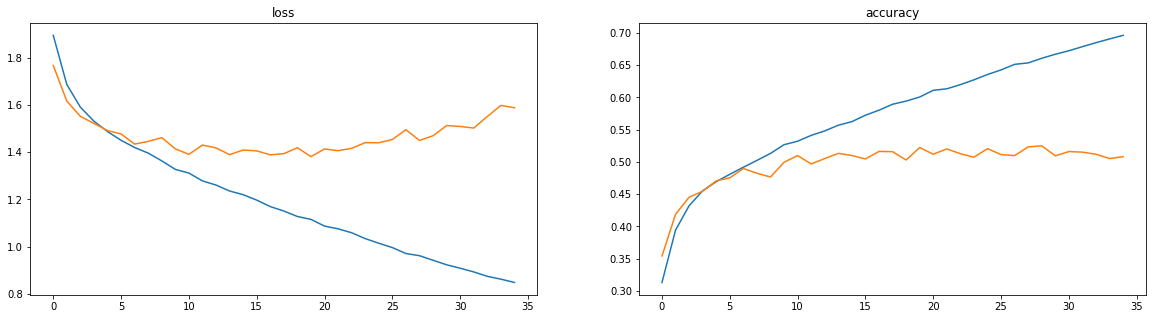

In [29]:

fig, axs = plt.subplots(1, 2,figsize=(20,5))

axs[0].plot(h.history['loss'])
axs[0].plot(h.history['val_loss'])
axs[0].set_title('loss')

axs[1].plot(h.history['accuracy'])
axs[1].plot(h.history['val_accuracy'])
axs[1].set_title('accuracy')



### b.Accuracy and loss

In [31]:
#Load model with best weights
model = tf.keras.models.load_model(f"/content/drive/My Drive/Models/cifar_dnn.hdf5")

In [32]:
loss, accuracy  = model.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy :{round(accuracy*100,4)} %")
print(f"Validation Loss :{loss}")

Validation accuracy :7.76 %
Validation Loss :1.4695254564285278


In [33]:
loss, accuracy  = model.evaluate(train_images, train_labels,verbose=0)
print(f"Training Accuracy :{round(accuracy*100,4)} %")
print(f"Training Validation Loss :{loss}")

Training Accuracy :7.824 %
Training Validation Loss :0.8620271682739258


### c. Classification Report

In [35]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.65      0.51      0.57      1000
           1       0.69      0.55      0.62      1000
           2       0.43      0.40      0.41      1000
           3       0.38      0.35      0.37      1000
           4       0.42      0.49      0.46      1000
           5       0.43      0.44      0.43      1000
           6       0.55      0.58      0.56      1000
           7       0.57      0.59      0.58      1000
           8       0.64      0.68      0.66      1000
           9       0.54      0.66      0.59      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.52     10000
weighted avg       0.53      0.53      0.52     10000



### d. Confusion Matrix

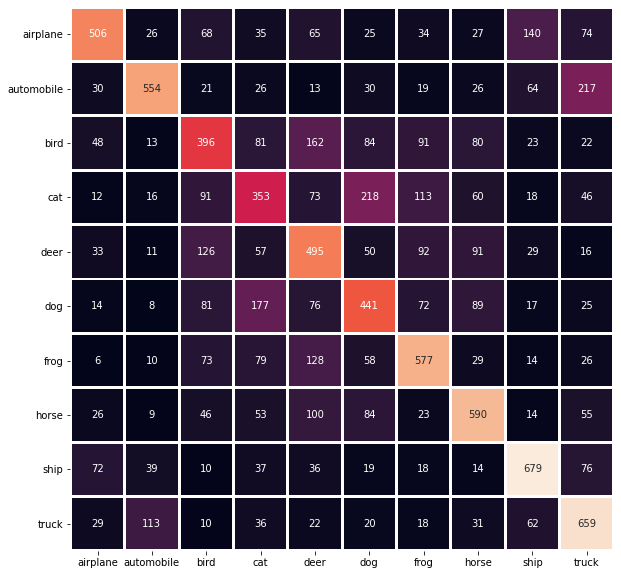

In [37]:
import seaborn as sns
labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
cm=confusion_matrix(test_labels,p)
plt.figure(figsize=(10,10))
sns.heatmap(cm,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2)

# CNN Cifar

## Set Constants

In [38]:
model_name = 'cifar_cnn'

input_shape = (32,32,3)
activation_h= tf.keras.activations.relu
activation_o = tf.keras.activations.softmax
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
epochs =100

## Model Creation

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation_h, input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation_h))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=activation_h))
model.add(tf.keras.layers.Dense(10,activation=activation_o))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               295168    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

## Training

In [40]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/{model_name}.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True,)

es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15)

logs = tf.keras.callbacks.CSVLogger(filename=f"{path_to_logs}/{model_name}.csv")

In [41]:
model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

h = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels),callbacks=[checkpointer,es,logs])

Epoch 1/100
1563/1563 [==============================] - ETA: 0s - loss: 2.0508 - accuracy: 0.4049
Epoch 00001: val_accuracy improved from -inf to 0.50800, saving model to drive/My Drive/Models/cifar_cnn.h5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0508 - accuracy: 0.4049 - val_loss: 1.9538 - val_accuracy: 0.5080
Epoch 2/100
1554/1563 [============================>.] - ETA: 0s - loss: 1.9372 - accuracy: 0.5230
Epoch 00002: val_accuracy improved from 0.50800 to 0.54060, saving model to drive/My Drive/Models/cifar_cnn.h5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9370 - accuracy: 0.5232 - val_loss: 1.9190 - val_accuracy: 0.5406
Epoch 3/100
1547/1563 [============================>.] - ETA: 0s - loss: 1.8900 - accuracy: 0.5704
Epoch 00003: val_accuracy improved from 0.54060 to 0.60050, saving model to drive/My Drive/Models/cifar_cnn.h5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8901 - accuracy: 0.5704 - val_loss: 1.86

## Evaluation
### a.Training Graph

Text(0.5, 1.0, 'accuracy')

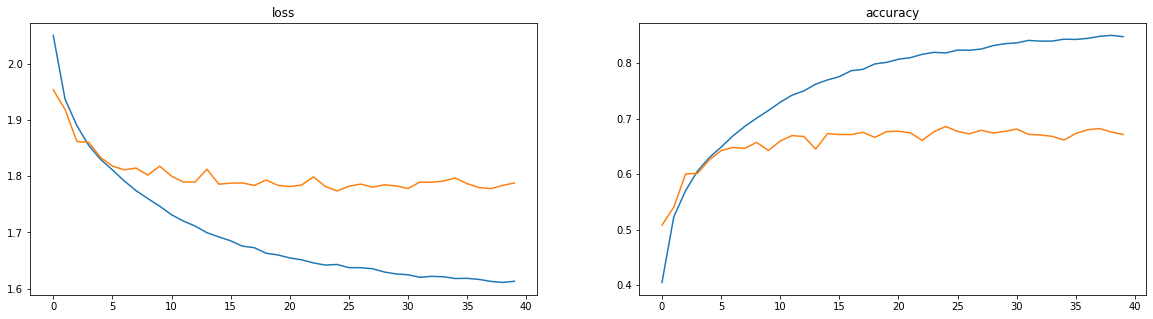

In [42]:

fig, axs = plt.subplots(1, 2,figsize=(20,5))

axs[0].plot(h.history['loss'])
axs[0].plot(h.history['val_loss'])
axs[0].set_title('loss')

axs[1].plot(h.history['accuracy'])
axs[1].plot(h.history['val_accuracy'])
axs[1].set_title('accuracy')



### b.Accuracy and loss

In [43]:
#Load model with best weights
model = tf.keras.models.load_model(f"{path_to_model}/{model_name}.h5")

In [44]:
loss, accuracy  = model.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy :{round(accuracy*1000,4)} %")
print(f"Validation Loss :{loss}")

Validation accuracy :94.8 %
Validation Loss :1.7738007307052612


In [45]:
loss, accuracy  = model.evaluate(train_images, train_labels,verbose=0)
print(f"Training Accuracy :{round(accuracy*1000,4)} %")
print(f"Training Validation Loss :{loss}")

Training Accuracy :98.04 %
Training Validation Loss :1.6223293542861938


### c. Classification Report

In [46]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.78      0.81      0.80      1000
           2       0.59      0.58      0.59      1000
           3       0.50      0.51      0.51      1000
           4       0.64      0.62      0.63      1000
           5       0.57      0.58      0.58      1000
           6       0.75      0.77      0.76      1000
           7       0.79      0.69      0.74      1000
           8       0.72      0.84      0.77      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



### d. Confusion Matrix

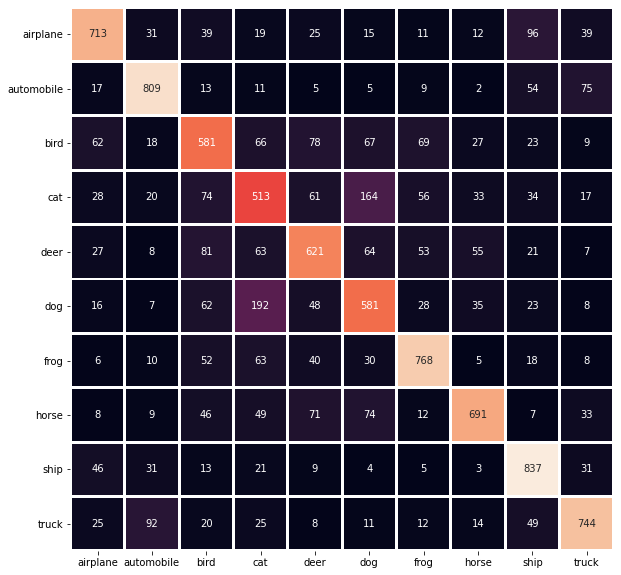

In [48]:
import seaborn as sns
labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
cm=confusion_matrix(test_labels,p)
plt.figure(figsize=(10,10))
sns.heatmap(cm,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2)

# Compare DNN vs CNN [CIFAR10]

In [50]:
model_cnn = tf.keras.models.load_model('/content/drive/My Drive/Models/cifar_cnn.h5')
model_dnn = tf.keras.models.load_model('/content/drive/My Drive/Models/cifar_dnn.hdf5')

In [51]:
logs_cnn = pd.read_csv('/content/drive/My Drive/Logs/cifar_cnn.csv')
logs_dnn = pd.read_csv('/content/drive/My Drive/Logs/cifar_dnn.csv')


## Compare Training

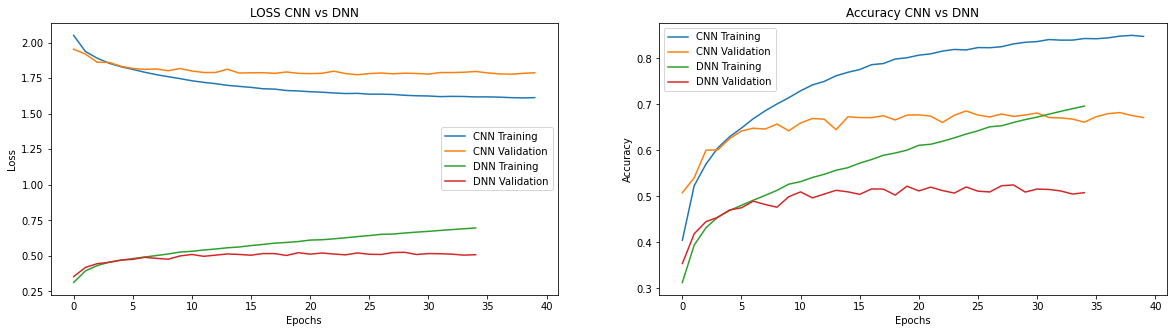

In [52]:

fig, axs = plt.subplots(1, 2,figsize=(20,5))

axs[0].plot(logs_cnn['loss'],label='CNN Training')
axs[0].plot(logs_cnn['val_loss'],label='CNN Validation')
axs[0].plot(logs_dnn['accuracy'],label='DNN Training')
axs[0].plot(logs_dnn['val_accuracy'],label='DNN Validation')

axs[0].set_title('LOSS CNN vs DNN')
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].legend(loc="best")





axs[1].plot(logs_cnn['accuracy'],label='CNN Training')
axs[1].plot(logs_cnn['val_accuracy'],label='CNN Validation')
axs[1].plot(logs_dnn['accuracy'],label='DNN Training')
axs[1].plot(logs_dnn['val_accuracy'],label='DNN Validation')

axs[1].set_title('Accuracy CNN vs DNN')
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].legend(loc="best")






## Compare Evaluaion


### Accuracy & Loss

In [53]:
loss_cnn, accuracy_cnn  = model_cnn.evaluate(test_images, test_labels,verbose=0)
loss_dnn, accuracy_dnn  = model_dnn.evaluate(test_images, test_labels,verbose=0)
print(f"Validation accuracy CNN :{round(accuracy_cnn*1000,4)} %")
print(f"Validation accuracy DNN :{round(accuracy_dnn*100,4)} %")
print(f"Validation Loss CNN:{loss_cnn}")
print(f"Validation Loss DNN :{loss_dnn}")

Validation accuracy CNN :94.8 %
Validation accuracy DNN :7.76 %
Validation Loss CNN:1.7738007307052612
Validation Loss DNN :1.4695254564285278


In [54]:
loss_cnn, accuracy_cnn  = model_cnn.evaluate(train_images, train_labels,verbose=0)
loss_dnn, accuracy_dnn  = model_dnn.evaluate(train_images, train_labels,verbose=0)
print(f"Training accuracy CNN :{round(accuracy_cnn*1000,4)} %")
print(f"Training accuracy DNN :{round(accuracy_dnn*100,4)} %")
print(f"Training Loss CNN:{loss_cnn}")
print(f"Training Loss DNN :{loss_dnn}")

Training accuracy CNN :98.04 %
Training accuracy DNN :7.824 %
Training Loss CNN:1.6223293542861938
Training Loss DNN :0.8620271682739258


## Compare Classification Report

In [55]:
import numpy as np
p_cnn=model_cnn.predict(test_images)
p_dnn=model_dnn.predict(test_images)
p_cnn = [np.argmax(x) for x in p_cnn]
p_dnn = [np.argmax(x) for x in p_dnn]

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print("Cnn Classification report")
print(classification_report(test_labels,p_cnn))
print("Dnn Classification report")
print(classification_report(test_labels,p_dnn))

Cnn Classification report
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.78      0.81      0.80      1000
           2       0.59      0.58      0.59      1000
           3       0.50      0.51      0.51      1000
           4       0.64      0.62      0.63      1000
           5       0.57      0.58      0.58      1000
           6       0.75      0.77      0.76      1000
           7       0.79      0.69      0.74      1000
           8       0.72      0.84      0.77      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

Dnn Classification report
              precision    recall  f1-score   support

           0       0.65      0.51      0.57      1000
           1       0.69      0.55      0.62      1000
           2       0.43   

## Confusion Matrix

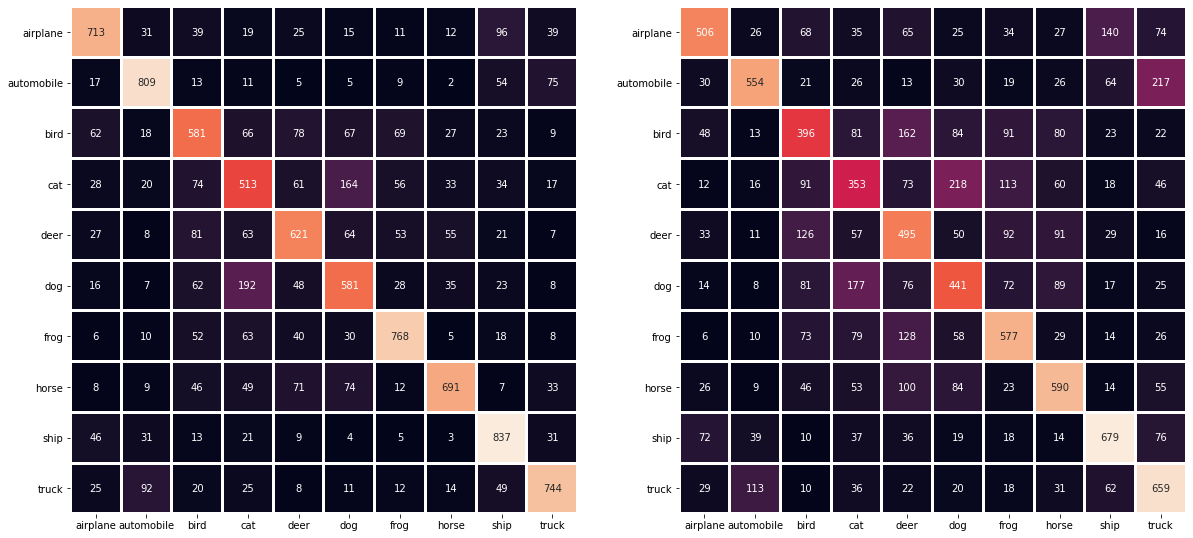

In [57]:
import seaborn as sns
labels =  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
cm_cnn=confusion_matrix(test_labels,p_cnn)
cm_dnn=confusion_matrix(test_labels,p_dnn)
fig, axs = plt.subplots(1, 2,figsize=(20,10))

sns.heatmap(cm_cnn,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2,ax=axs[0])

sns.heatmap(cm_dnn,square=True,cbar=False,xticklabels=labels,yticklabels=labels,annot=True,fmt="d",linewidths=2,ax=axs[1])

# Demo Models

In [58]:
import tensorflow as tf

In [59]:
model = tf.keras.models.load_model('/content/drive/My Drive/Models/cifar_cnn.h5')

### Load image

In [78]:
from google.colab import files

files.upload()

Saving 31170124_355309831644176_4994517524629422080_n-5b3a4d0ec9e77c003771e6a6.jpg to 31170124_355309831644176_4994517524629422080_n-5b3a4d0ec9e77c003771e6a6 (1).jpg


{'31170124_355309831644176_4994517524629422080_n-5b3a4d0ec9e77c003771e6a6.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x048\x048\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf6R\xaf\x9fT\xf1\xfb<\x93\xc6\xf9\x0fm\xe2z\xf3\xa1)\xac\xaa4\xb3QZ\xaa3\xcd\x16f\xad@"\xddB\x8a\xe1,h8\xb88\xf2\xc8\xd8xa\xd1>Y\x9dB\xe6Z\xf5\x0b\x90q\xd8\xd5\xc6\xf4\x12\xea\xbe\x99G\x0

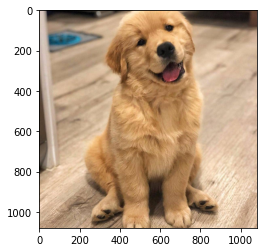

In [79]:
import cv2
img = cv2.imread("/content/31170124_355309831644176_4994517524629422080_n-5b3a4d0ec9e77c003771e6a6 (1).jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [80]:
img.shape

(1080, 1080, 3)

## Preprocess image

In [81]:
inp_shape=(32,32,3)
img.resize(inp_shape)
img.shape

(32, 32, 3)

In [82]:
img = img.reshape((1,32,32,3))
print(img.shape)

(1, 32, 32, 3)


### Predict

In [85]:
labels=  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
i=np.argmax(model.predict(img))
p=labels[i]
print("Predicted label: " + p)

Predicted label: airplane


# Load Random Input

In [86]:
from google.colab import files

files.upload()

Saving download.jfif to download (1).jfif


{'download.jfif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x10\r\r\x10\x10\x10\x10\r\x10\x10\r\r\r\r\r\r\r\r\x1b\x10\x10\x0e\r \x1d"" \x1d\x1f\x1f$(4,$&1\'\x1f\x1f-2-1+7000#+5@?.7492-\x01\n\n\n\x05\x05\x05\x0e\x05\x05\x0e+\x19\x13\x19++++++++++++++++++++++++++++++++++++++++++++++++++\xff\xc0\x00\x11\x08\x00\xc8\x00\xc8\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x00\x06\x07\x05\x08\xff\xc4\x00<\x10\x00\x02\x02\x01\x01\x05\x05\x05\x06\x04\x05\x05\x00\x00\x00\x00\x01\x02\x00\x03\x11\x04\x05\x06\x12!1\x07AQaq\x13"R\x81\x91#2B\xa1\xb1\xc13b\xd1\xe1\x15\xb2\xe2\xf0\xf1\x14$Cr\xc2\xff\xc4\x00\x14\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xc4\x00\x14\x11\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\xf6\x02C\x0b\x0c\x08A`\x08\x10\x80\x

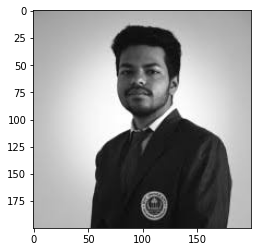

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/31170124_355309831644176_4994517524629422080_n-5b3a4d0ec9e77c003771e6a6.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [90]:
img.shape

(200, 200, 3)

## Preprocess image

In [91]:
inp_shape=(32,32,3)
img.resize(inp_shape)
img.shape

(32, 32, 3)

In [94]:
img = img.reshape((1,32,32,3))
print(img.shape)

(1, 32, 32, 3)


### Predict

In [95]:
labels=  ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
i=np.argmax(model.predict(img))
p=labels[i]
print("Predicted label: " + p)

Predicted label: airplane
